# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [153]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [154]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


### Import Statements

In [155]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [156]:
#pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [157]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [158]:
print(f"Shape of df_data is: {df_data.shape}")
print("It has 9 rows and 4324 columns.")

Shape of df_data is: (4324, 9)
It has 9 rows and 4324 columns.


In [159]:
print("Column names are:")
for column in df_data.columns:
    print(column)

Column names are:
Unnamed: 0
Unnamed: 0.1
Organisation
Location
Date
Detail
Rocket_Status
Price
Mission_Status


In [160]:
print(df_data.isna().any())
print("In column 'Price' are NaN values.")

Unnamed: 0        False
Unnamed: 0.1      False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool
In column 'Price' are NaN values.


In [161]:
df = pd.DataFrame(df_data)
print(df.duplicated().any())
print("There aren't any duplicated values.")

False
There aren't any duplicated values.


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [162]:
df = df.drop_duplicates()

In [163]:
df.drop(["Unnamed: 0", "Unnamed: 0.1"], inplace=True, axis=1)
df_price_clean = df.dropna()
df_price_clean

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success


## Descriptive Statistics

In [164]:
df_price_clean['Price'] = [ i.replace(",","") for i in df_price_clean['Price'] ]
df_price_clean['Price'] = pd.to_numeric(df_price_clean['Price'], downcast="float")

C:\Users\tabi\AppData\Local\Temp\ipykernel_2016\1938199716.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tabi\AppData\Local\Temp\ipykernel_2016\1938199716.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [165]:
print(df_price_clean.describe())
print(df_price_clean.max())
print(df_price_clean.min())

             Price
count   964.000000
mean    153.792206
std     288.450745
min       5.300000
25%      40.000000
50%      62.000000
75%     164.000000
max    5000.000000
Organisation                                Virgin Orbit
Location          Xichang Satellite Launch Center, China
Date                          Wed Sep 30, 2015 20:30 UTC
Detail                                Vega | Sentinel-2A
Rocket_Status                              StatusRetired
Price                                             5000.0
Mission_Status                                   Success
dtype: object
Organisation                                            Arianespace
Location          Cosmic Girl, Mojave Air and Space Port, Califo...
Date                                     Fri Apr 04, 1997 16:47 UTC
Detail                                  Antares 110 | Antares A-ONE
Rocket_Status                                          StatusActive
Price                                                           5.3
Mission_

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [403]:
org_group = df.groupby(['Organisation'], as_index=False)['Mission_Status'].count()
fig = px.bar(org_group, y="Organisation", x="Mission_Status", title="Number of Launches per Company", color="Organisation")
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [167]:
rocket_status_values = df["Rocket_Status"].value_counts()

In [406]:
rocket_status_pie = px.pie(rocket_status_values, values=rocket_status_values.values, color=rocket_status_values.index, title="Number of Active versus Retired Rockets")
rocket_status_pie.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [169]:
mission_success = df["Mission_Status"].value_counts()

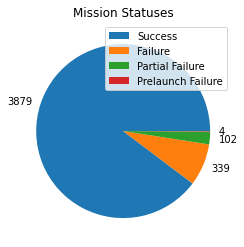

3879 were successful missions. 445 were failures.


In [407]:
plt.pie(mission_success, labels=mission_success.values)
plt.title("Mission Statuses")
plt.legend(mission_success.index)
plt.show()
all_failures = mission_success["Failure"] + mission_success["Partial Failure"] + mission_success["Prelaunch Failure"]
success = mission_success["Success"]
print(f"{success} were successful missions. {all_failures} were failures.")

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [171]:
df_price_clean["Price"].describe()

count     964.000000
mean      153.792206
std       288.450745
min         5.300000
25%        40.000000
50%        62.000000
75%       164.000000
max      5000.000000
Name: Price, dtype: float64

In [416]:
price_hist = px.histogram(df_price_clean, y="Price", x="Organisation", title='How expensive are the launches?', nbins=20)
price_hist.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [195]:
df['Country'] = [x.split(', ')[-1] for x in df['Location'].values]
df.loc[df['Country'] == "Russia", 'Country'] = "Russian Federation"
df.loc[df['Country'] == "New Mexico", 'Country'] = "USA"
df.loc[df['Country'] == "Yellow Sea", 'Country'] = "China"
df.loc[df['Country'] == "Shahrud Missile Test Site", 'Country'] = "Iran, Islamic Republic of"
df.loc[df['Country'] == "Iran", 'Country'] = "Iran, Islamic Republic of"
df.loc[df['Country'] == "Pacific Missile Range Facility", 'Country'] = "USA"
df.loc[df['Country'] == "Pacific Ocean", 'Country'] = "USA"
df.loc[df['Country'] == "Barents Sea", 'Country'] = "Russian Federation"
df.loc[df['Country'] == "Gran Canaria", 'Country'] = "USA"
df.loc[df['Country'] == "North Korea", 'Country'] = "KP"
df.loc[df['Country'] == "South Korea", 'Country'] = "KR"

In [418]:
grouped = df.groupby(['Country'], as_index=False)
country_df = pd.DataFrame(grouped['Mission_Status'].count())
country_df['Country'] = [countries.get(country_name).alpha3 for country_name in country_df["Country"].values]

figM = px.choropleth(country_df, locations="Country",
                    color="Mission_Status",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma, labels={"Mission_Status": "Number of launches"})
figM.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [197]:
missionFailureDf = pd.DataFrame(df.loc[df["Mission_Status"] != "Success"])
missionFailureDf['Country'] = [countries.get(country_name).alpha3 for country_name in missionFailureDf['Country']]
missionGrouped = missionFailureDf.groupby('Country', as_index=False).count()

In [417]:
figC = px.choropleth(missionGrouped, locations=missionGrouped['Country'],
                    color=missionGrouped['Mission_Status'],
                    hover_name=missionGrouped['Country'],
                    color_continuous_scale=px.colors.sequential.Plasma, labels={"Mission_Status": "Number of failures"})
figC.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [482]:
sb_countries_chart = df.groupby(['Country', 'Organisation', "Mission_Status"], as_index=False).count()

In [481]:
px.sunburst(sb_countries_chart, values='Rocket_Status', path=["Country","Organisation",'Mission_Status'], labels={'Rocket_Status': "Number of Launches"})

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [200]:
total_money = df_price_clean.groupby(["Organisation"], as_index=False).agg({"Price": pd.Series.count})

In [201]:
price_bar = px.bar(total_money, x="Price", y="Organisation", color="Organisation", orientation='h')

In [202]:
price_bar.update_layout(xaxis_title="Amount of Money spent on Space Mission (price in millions)", yaxis_title="Organisations", yaxis={'categoryorder':'total ascending'})
price_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

# Chart the Number of Launches per Year

In [214]:
df['Year'] = [x.split(' ')[3] for x in df['Date'].values]
df_price_clean['Year'] = [y.split(' ')[3] for y in df_price_clean['Date'].values]
grouped_launches = df.groupby(["Year"], as_index=False)["Mission_Status"].count()
grouped_launches.tail()

C:\Users\tabi\AppData\Local\Temp\ipykernel_2016\331707831.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Mission_Status
59,2016,90
60,2017,92
61,2018,117
62,2019,109
63,2020,63


In [215]:
number_launches_bar = px.bar(grouped_launches, x="Year", y="Mission_Status", labels={'Mission_Status':'Number of launches'}, title="Number of Launches per Year")
number_launches_bar.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [216]:
df['Month'] = [x.split(' ')[1] for x in df['Date'].values]
launches_month = df.groupby(["Month"], as_index=False)["Mission_Status"].count().sort_values(by="Mission_Status", ascending=False)
launches_month.head()

,Month,Mission_Status
2,Dec,450
6,Jun,402
0,Apr,383
10,Oct,381
1,Aug,373


In [206]:
number_launches_month_bar = px.bar(launches_month, x="Month", y="Mission_Status", labels={'Mission_Status':'Number of launches'}, title="Number of Launches per Month", color="Month")
number_launches_month_bar.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [217]:
price_year_grouped = df_price_clean.groupby(['Year'], as_index=False)["Price"].agg('mean')
price_year_grouped

,Year,Price
0,1964,63.230000
1,1965,63.230000
2,1966,59.000000
3,1967,196.625000
4,1968,279.200012
5,1969,609.500000
6,1970,1160.000000
7,1971,1160.000000
8,1972,1160.000000
9,1973,1160.000000


In [218]:
launch_price_over_time = px.line(price_year_grouped, x="Year", y="Price", title="Avarage price of rocket launches overe time", labels={'Price':'Avarage price in milions'})
launch_price_over_time.update_xaxes(
    ticks="outside",
    ticklen=20,
    tickangle=45
)   

launch_price_over_time.update_yaxes(
    ticklen=100
)
launch_price_over_time.show()


# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [219]:
grouped_org_launch = df.groupby(["Organisation"], as_index=False)["Mission_Status"].count()
top_ten_orgs = grouped_org_launch.sort_values(by="Mission_Status", ascending=False)[:10]
top_ten_orgs

,Organisation,Mission_Status
40,RVSN USSR,1777
3,Arianespace,279
17,General Dynamics,251
7,CASC,251
35,NASA,203
52,VKS RF,201
49,US Air Force,161
48,ULA,140
6,Boeing,136
34,Martin Marietta,114


In [221]:
top_over_time = df[np.isin(df, top_ten_orgs.Organisation.values).any(axis=1)]
grouped_org_times = top_over_time.groupby(['Organisation', 'Year'], as_index=False)['Mission_Status'].count().sort_values(by="Year", ascending=False)
grouped_org_times

,Organisation,Year,Mission_Status
322,VKS RF,2020,3
101,CASC,2020,19
36,Arianespace,2020,4
268,ULA,2020,4
35,Arianespace,2019,9
...,...,...,...
170,NASA,1959,1
269,US Air Force,1958,2
169,NASA,1958,2
216,RVSN USSR,1958,5


In [223]:
px.bar(grouped_org_times, x='Mission_Status', y="Year", color='Organisation', labels={"Mission_Status": "Number of launches"})

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [224]:
df['Year'] = pd.to_numeric(df['Year'])

In [247]:
cold_war_data = df.loc[(df['Year'] <= 1991)]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [250]:
cold_war_data = cold_war_data[cold_war_data.Country.isin(['USA', 'Russia Federation', 'Kazakhstan'])]
cold_war_data.loc[cold_war_data['Country'] == "Kazakhstan", 'Country'] = "Russian Federation"

In [265]:
cold_war_number_launches_grouped = cold_war_data.groupby(['Country'], as_index=False)["Mission_Status"].count()
cold_war_pie = px.pie(cold_war_number_launches_grouped, values='Mission_Status', names="Country", title="Total number of launches during Cold War")
cold_war_pie.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [268]:
year_launches_grouped = cold_war_data.groupby(['Country', 'Year'], as_index=False)["Mission_Status"].count()

In [271]:
year_launches_chart = px.bar(year_launches_grouped, x="Year", y='Mission_Status', color="Country", title="Total Number of Launches Year-On-Year", labels={'Mission_Status': "Number of launches"})
year_launches_chart.show()

## Chart the Total Number of Mission Failures Year on Year.

In [280]:
failure_df = pd.DataFrame(df.loc[df["Mission_Status"] != "Success"])
year_failures_grouped = failure_df.groupby(['Country', 'Year'], as_index=False)["Mission_Status"].count()

In [281]:
year_failures_chart = px.bar(year_failures_grouped, x="Year", y="Mission_Status", color="Country", labels={"Mission_Status": "Number of failed launches"}, title="Total Number of Mission Failures Year on Year")
year_failures_chart.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [352]:
gp = df.groupby(['Year'], as_index=False)['Mission_Status'].count()
gp2 = failure_df.groupby(['Year'], as_index=False)['Mission_Status'].count()

In [367]:
failure_perc = gp2['Mission_Status'] / gp['Mission_Status']
percentage_bar = px.bar(gp, x="Year", y=failure_perc.values*100,labels={"y": "Percentage of failure"}, title="Percentage of failure over time")
percentage_bar.update_traces(textposition='outside')
percentage_bar.show()

In [368]:
print("Percentage of failure goes down over time and countries improved their success.")

Percentage of failure goes down over time and countries improved their success.


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [382]:
successful_launches = df.loc[df['Mission_Status'] == "Success"]
country_lead_grouped = df.groupby(['Year', 'Country'], as_index=False)['Mission_Status'].count()
country_lead_grouped_success = successful_launches.groupby(['Year', 'Country'], as_index=False)['Mission_Status'].count()

In [376]:
country_lead = px.bar(country_lead_grouped, x='Year', y="Mission_Status", color="Country", title="Lead country in terms of Total Number of Launches over Time", labels={"Mission_Status": "Number of Launches"})
country_lead.show()

In [383]:
country_lead_success = px.bar(country_lead_grouped_success, x="Year", y="Mission_Status", labels={"Mission_Status": "Successful launches"}, color="Country", title="Lead country in terms of Total Successful Number of Launches over Time")
country_lead_success.show()

In [384]:
print("Results are not changed much after adding another bar to compare with successful launches.")

Results are not changed much after adding another bar to compare with successful launches.


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [387]:
organisation_lead_grouped = df.groupby(['Year', 'Organisation'], as_index=False)['Mission_Status'].count()

In [389]:
organisation_lead_bar = px.bar(organisation_lead_grouped, x="Year", y="Mission_Status", color="Organisation", title="Organisation with most number of Launches Year-on-Year", labels={"Mission_Status": "Number of Launches"})
organisation_lead_bar.show()

In [391]:
print("The most dominant organisation during 70s and 80s was RVSN USSR.")
print("The most dominant organisation in 2018, 2019 and 2020 was CASC.")

The most dominant organisation during 70s and 80s was RVSN USSR.
The most dominant organisation in 2018, 2019 and 2020 was CASC.
